## RMOTR FINAL PROJECT: Regression Tests to Predict Job Satisfaction

#### Create a model that predicts Job satisfaction for a developer.
#### What variables are the most relevant for this? 
#### And what factors have a greater influence in higher job satisfaction?

1. Drop NaNs
- Convert object categorical data into proper ordered categorical data type (then convert to values)
- Split other categorical data into dummy variables
- Build models with final data set split into training and test data
- Plot linear, ridge, and lasso regressions
- Analyze sorted coefficients in each regression type

In [1]:
# Initiliaze Common Packages/Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from zipfile import ZipFile
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import OneHotEncoder
# from bokeh.io import show, output_file
# from bokeh.plotting import figure

from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import binarize
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras import regularizers
# from keras.optimizers import SGD,Adam
# from keras.utils import to_categorical
# from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize': (18, 10)})

In [2]:
zip_file = ZipFile('data/stack-overflow-2018-developer-survey.zip')

In [3]:
##df_public = pd.read_csv('data/survey_results_public.csv')
##df_schema = pd.read_csv('data/survey_results_schema.csv')
#df_public = pd.read_csv(zip_file.open('survey_results_public.csv'))
df_public_numbered = pd.read_csv(zip_file.open('survey_results_public.csv'))

In [4]:
#df_public['JobSatisfaction'].unique()

## drop NaN data from Job Satisfaction

In [5]:
df_public_numbered['ConvertedSalary'].head()

0        NaN
1    70841.0
2        NaN
3        NaN
4    21426.0
Name: ConvertedSalary, dtype: float64

In [6]:
# drop NaN data from Job Satisfaction
#df_public.dropna(subset=['JobSatisfaction'], inplace=True)

In [7]:
#df_public['JobSatisfaction'].unique()

# Convert the Career Satisfaction Data to an ordered categorical data type

In [8]:
cat_dtype = CategoricalDtype(categories=reversed([
    'Extremely dissatisfied',
    'Moderately dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Moderately satisfied',
    'Extremely satisfied']),
    ordered=True)

In [11]:
df_public_numbered['JobSatisfaction'].unique()

array(['Extremely satisfied', 'Moderately dissatisfied',
       'Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly satisfied', 'Slightly dissatisfied',
       'Extremely dissatisfied'], dtype=object)

In [12]:
df_public_numbered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69276 entries, 0 to 80449
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 68.7+ MB


In [13]:
# RECREATE SUBSET OF DATASET
sub_df = df_public_numbered.loc[:,[
    'JobSatisfaction',
    'CareerSatisfaction',
    'ConvertedSalary', 
    'DevType',
    'FormalEducation',
    'YearsCoding',
    'YearsCodingProf',
    'LanguageWorkedWith',
    'DatabaseWorkedWith',
    'PlatformWorkedWith',
    'FrameworkWorkedWith',
    'Gender',
    'NumberMonitors',
    'StackOverflowVisit',
    'StackOverflowParticipate',
    'StackOverflowConsiderMember',
    'Age'
    ]]

for col in sub_df:
    if sub_df[col].dtype == object:
        sub_df[col][sub_df[col].isna()] = 'No Response'

In [14]:
sub_df.info()
# sub_df['NumberMonitors']

# sub_df['StackOverflowVisit'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69276 entries, 0 to 80449
Data columns (total 17 columns):
JobSatisfaction                69276 non-null object
CareerSatisfaction             69276 non-null object
ConvertedSalary                45181 non-null float64
DevType                        69276 non-null object
FormalEducation                69276 non-null object
YearsCoding                    69276 non-null object
YearsCodingProf                69276 non-null object
LanguageWorkedWith             69276 non-null object
DatabaseWorkedWith             69276 non-null object
PlatformWorkedWith             69276 non-null object
FrameworkWorkedWith            69276 non-null object
Gender                         69276 non-null object
NumberMonitors                 69276 non-null object
StackOverflowVisit             69276 non-null object
StackOverflowParticipate       69276 non-null object
StackOverflowConsiderMember    69276 non-null object
Age                            69276 non-n

In [15]:
# JOB SATISFACTION CONVERTED (and other categories)
sub_df['JobSatisfaction'] = sub_df['JobSatisfaction'].astype(CategoricalDtype([
    'Extremely dissatisfied',
    'Moderately dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied','Moderately satisfied',
    'Extremely satisfied'
],ordered=True))

sub_df['CareerSatisfaction'] = sub_df['CareerSatisfaction'].astype(CategoricalDtype([
    'Extremely dissatisfied',
    'Moderately dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied','Moderately satisfied',
    'Extremely satisfied'
],ordered=True))

sub_df['NumberMonitors'] = sub_df['NumberMonitors'].astype(CategoricalDtype([
    'No Response', '1', '2', '3', '4', 'More than 4'
],ordered=True))

sub_df['StackOverflowVisit'] = sub_df['StackOverflowVisit'].astype(CategoricalDtype([
    'No Response', 'I have never visited Stack Overflow (before today)', 'Less than once per month or monthly',
    'A few times per month or weekly', 'A few times per week', 'Daily or almost daily',
    'Multiple times per day'
],ordered=True))

sub_df['StackOverflowConsiderMember'] = sub_df['StackOverflowConsiderMember'].astype(CategoricalDtype([
    'No Response', "I'm not sure", "No", "Yes"
],ordered=True))

sub_df['StackOverflowParticipate'] = sub_df['StackOverflowParticipate'].astype(CategoricalDtype([
    'No Response', 'I have never participated in Q&A on Stack Overflow', 'Less than once per month or monthly',
    'A few times per month or weekly', 'A few times per week', 'Daily or almost daily',
    'Multiple times per day'
],ordered=True))

sub_df['YearsCoding'] = sub_df['YearsCoding'].astype(CategoricalDtype([
    '0-2 years', '3-5 years', '6-8 years', '9-11 years'    
    , '12-14 years','15-17 years', '18-20 years' 
    , '21-23 years', '24-26 years', '27-29 years','30 or more years'
],ordered=True))

sub_df['YearsCodingProf'] = sub_df['YearsCodingProf'].astype(CategoricalDtype([
    '0-2 years', '3-5 years', '6-8 years', '9-11 years'    
    , '12-14 years','15-17 years', '18-20 years' 
    , '21-23 years', '24-26 years', '27-29 years','30 or more years'], ordered=True))

# sub_df['CompanySize'] = sub_df['CompanySize'].astype(CategoricalDtype([
#     'Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees',
#     '100 to 499 employees', '500 to 999 employees',
#     '1,000 to 4,999 employees','5,000 to 9,999 employees', '10,000 or more employees'
# ],ordered=True))

# sub_df['JobSatisfaction'] = sub_df['JobSatisfaction'].astype(CategoricalDtype([
#     'No Response','Extremely dissatisfied', 'Moderately dissatisfied', 'Slightly dissatisfied',
#     'Neither satisfied nor dissatisfied', 'Slightly satisfied', 'Moderately satisfied', 'Extremely satisfied'
# ],ordered=True))

sub_df['FormalEducation'] = sub_df['FormalEducation'].astype(CategoricalDtype([
    'I never completed any formal education',
    'Primary/elementary school',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'Some college/university study without earning a degree',
    'Associate degree',
    'Bachelor’s degree (BA, BS, B.Eng., etc.)',
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
    'Professional degree (JD, MD, etc.)', 
    'Other doctoral degree (Ph.D, Ed.D., etc.)'], ordered=True))

sub_df['Age'] = sub_df['Age'].astype(CategoricalDtype([
    'Under 18 years old', '18 - 24 years old', '25 - 34 years old',
    '35 - 44 years old', '45 - 54 years old',  '55 - 64 years old'
    ,'65 years or older'
],ordered=True))

In [16]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69276 entries, 0 to 80449
Data columns (total 17 columns):
JobSatisfaction                69276 non-null category
CareerSatisfaction             69276 non-null category
ConvertedSalary                45181 non-null float64
DevType                        69276 non-null object
FormalEducation                68219 non-null category
YearsCoding                    69233 non-null category
YearsCodingProf                69276 non-null category
LanguageWorkedWith             69276 non-null object
DatabaseWorkedWith             69276 non-null object
PlatformWorkedWith             69276 non-null object
FrameworkWorkedWith            69276 non-null object
Gender                         69276 non-null object
NumberMonitors                 69276 non-null category
StackOverflowVisit             69276 non-null category
StackOverflowParticipate       69276 non-null category
StackOverflowConsiderMember    69276 non-null category
Age                     

In [17]:
DevType_dummies = pd.get_dummies(sub_df['DevType'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_devtype').sum(level=0)
DevType_dummies.head(10)

,var_devtype_Back-end developer,"var_devtype_C-suite executive (CEO, CTO, etc.)",var_devtype_Data or business analyst,var_devtype_Data scientist or machine learning specialist,var_devtype_Database administrator,var_devtype_Designer,var_devtype_Desktop or enterprise applications developer,var_devtype_DevOps specialist,var_devtype_Educator or academic researcher,var_devtype_Embedded applications or devices developer,...,var_devtype_Front-end developer,var_devtype_Full-stack developer,var_devtype_Game or graphics developer,var_devtype_Marketing or sales professional,var_devtype_Mobile developer,var_devtype_No Response,var_devtype_Product manager,var_devtype_QA or test developer,var_devtype_Student,var_devtype_System administrator
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
5,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,1,1,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
10,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [18]:
Language_dummies = pd.get_dummies(sub_df['LanguageWorkedWith'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_langs').sum(level=0)
Language_dummies.head()

,var_langs_Assembly,var_langs_Bash/Shell,var_langs_C,var_langs_C#,var_langs_C++,var_langs_CSS,var_langs_Clojure,var_langs_Cobol,var_langs_CoffeeScript,var_langs_Delphi/Object Pascal,...,var_langs_R,var_langs_Ruby,var_langs_Rust,var_langs_SQL,var_langs_Scala,var_langs_Swift,var_langs_TypeScript,var_langs_VB.NET,var_langs_VBA,var_langs_Visual Basic 6
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,1,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [19]:
Database_dummies = pd.get_dummies(sub_df['DatabaseWorkedWith'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_db').sum(level=0)
Database_dummies.head()

,var_db_Amazon DynamoDB,var_db_Amazon RDS/Aurora,var_db_Amazon Redshift,var_db_Apache HBase,var_db_Apache Hive,var_db_Cassandra,var_db_Elasticsearch,var_db_Google BigQuery,var_db_Google Cloud Storage,var_db_IBM Db2,...,"var_db_Microsoft Azure (Tables, CosmosDB, SQL, etc)",var_db_MongoDB,var_db_MySQL,var_db_Neo4j,var_db_No Response,var_db_Oracle,var_db_PostgreSQL,var_db_Redis,var_db_SQL Server,var_db_SQLite
0,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0


In [20]:
Platform_dummies = pd.get_dummies(sub_df['PlatformWorkedWith'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_pform').sum(level=0)
Platform_dummies.head()

,var_pform_AWS,var_pform_Amazon Echo,var_pform_Android,var_pform_Apple Watch or Apple TV,var_pform_Arduino,var_pform_Azure,var_pform_Drupal,var_pform_ESP8266,var_pform_Firebase,var_pform_Gaming console,...,var_pform_No Response,var_pform_Predix,var_pform_Raspberry Pi,var_pform_Salesforce,var_pform_Serverless,var_pform_SharePoint,var_pform_Windows Desktop or Server,var_pform_Windows Phone,var_pform_WordPress,var_pform_iOS
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
Framework_dummies = pd.get_dummies(sub_df['FrameworkWorkedWith'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_fwork').sum(level=0)
Framework_dummies.head()

,var_fwork_.NET Core,var_fwork_Angular,var_fwork_Cordova,var_fwork_Django,var_fwork_Hadoop,var_fwork_No Response,var_fwork_Node.js,var_fwork_React,var_fwork_Spark,var_fwork_Spring,var_fwork_TensorFlow,var_fwork_Torch/PyTorch,var_fwork_Xamarin
0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0


In [22]:
Gender_dummies = pd.get_dummies(sub_df['Gender'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_gender').sum(level=0)
Gender_dummies.head()

,var_gender_Female,var_gender_Male,var_gender_No Response,"var_gender_Non-binary, genderqueer, or gender non-conforming",var_gender_Transgender
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [23]:
sub_df = pd.concat([sub_df, DevType_dummies, Language_dummies, Database_dummies, Platform_dummies, Framework_dummies],axis=1)
sub_df.head()

,JobSatisfaction,CareerSatisfaction,ConvertedSalary,DevType,FormalEducation,YearsCoding,YearsCodingProf,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,...,var_fwork_Django,var_fwork_Hadoop,var_fwork_No Response,var_fwork_Node.js,var_fwork_React,var_fwork_Spark,var_fwork_Spring,var_fwork_TensorFlow,var_fwork_Torch/PyTorch,var_fwork_Xamarin
0,Extremely satisfied,Extremely satisfied,NaN,Full-stack developer,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,3-5 years,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,...,1,0,0,0,1,0,0,0,0,0
1,Moderately dissatisfied,Neither satisfied nor dissatisfied,70841.0,Database administrator;DevOps specialist;Full-...,"Bachelor’s degree (BA, BS, B.Eng., etc.)",30 or more years,18-20 years,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,Linux,...,1,0,0,0,0,0,0,0,0,0
2,Moderately satisfied,Moderately satisfied,NaN,Engineering manager;Full-stack developer,Associate degree,24-26 years,6-8 years,No Response,No Response,No Response,...,0,0,1,0,0,0,0,0,0,0
3,Neither satisfied nor dissatisfied,Slightly dissatisfied,NaN,Full-stack developer,"Bachelor’s degree (BA, BS, B.Eng., etc.)",18-20 years,12-14 years,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,...,0,0,1,0,0,0,0,0,0,0
4,Slightly satisfied,Moderately satisfied,21426.0,Data or business analyst;Desktop or enterprise...,Some college/university study without earning ...,6-8 years,0-2 years,C;C++;Java;Matlab;R;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,...,0,0,1,0,0,0,0,0,0,0


In [24]:
sub_df['CountLanguageWorkedWith'] = [0 if v == 'No Response' else len(v.split(';')) for v in sub_df['LanguageWorkedWith']]

In [25]:
sub_df['CountDBWorkedWith'] = [0 if v == 'No Response' else len(v.split(';')) for v in sub_df['DatabaseWorkedWith']]

In [26]:
sub_df['CountPlatformWorkedWith'] = [0 if v == 'No Response' else len(v.split(';')) for v in sub_df['PlatformWorkedWith']]

In [27]:
sub_df['CountFrameworkWorkedWith'] = [0 if v == 'No Response' else len(v.split(';')) for v in sub_df['FrameworkWorkedWith']]

In [28]:
sub_df.head()

,JobSatisfaction,CareerSatisfaction,ConvertedSalary,DevType,FormalEducation,YearsCoding,YearsCodingProf,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,...,var_fwork_React,var_fwork_Spark,var_fwork_Spring,var_fwork_TensorFlow,var_fwork_Torch/PyTorch,var_fwork_Xamarin,CountLanguageWorkedWith,CountDBWorkedWith,CountPlatformWorkedWith,CountFrameworkWorkedWith
0,Extremely satisfied,Extremely satisfied,NaN,Full-stack developer,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,3-5 years,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,...,1,0,0,0,0,0,4,6,4,2
1,Moderately dissatisfied,Neither satisfied nor dissatisfied,70841.0,Database administrator;DevOps specialist;Full-...,"Bachelor’s degree (BA, BS, B.Eng., etc.)",30 or more years,18-20 years,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,Linux,...,0,0,0,0,0,0,3,3,1,1
2,Moderately satisfied,Moderately satisfied,NaN,Engineering manager;Full-stack developer,Associate degree,24-26 years,6-8 years,No Response,No Response,No Response,...,0,0,0,0,0,0,0,0,0,0
3,Neither satisfied nor dissatisfied,Slightly dissatisfied,NaN,Full-stack developer,"Bachelor’s degree (BA, BS, B.Eng., etc.)",18-20 years,12-14 years,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,...,0,0,0,0,0,0,7,2,1,0
4,Slightly satisfied,Moderately satisfied,21426.0,Data or business analyst;Desktop or enterprise...,Some college/university study without earning ...,6-8 years,0-2 years,C;C++;Java;Matlab;R;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,...,0,0,0,0,0,0,7,4,2,0


In [29]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69276 entries, 0 to 80449
Columns: 143 entries, JobSatisfaction to CountFrameworkWorkedWith
dtypes: category(10), float64(1), int64(4), object(6), uint8(122)
memory usage: 17.6+ MB


In [30]:
sub_df.head()

,JobSatisfaction,CareerSatisfaction,ConvertedSalary,DevType,FormalEducation,YearsCoding,YearsCodingProf,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,...,var_fwork_React,var_fwork_Spark,var_fwork_Spring,var_fwork_TensorFlow,var_fwork_Torch/PyTorch,var_fwork_Xamarin,CountLanguageWorkedWith,CountDBWorkedWith,CountPlatformWorkedWith,CountFrameworkWorkedWith
0,Extremely satisfied,Extremely satisfied,NaN,Full-stack developer,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,3-5 years,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,...,1,0,0,0,0,0,4,6,4,2
1,Moderately dissatisfied,Neither satisfied nor dissatisfied,70841.0,Database administrator;DevOps specialist;Full-...,"Bachelor’s degree (BA, BS, B.Eng., etc.)",30 or more years,18-20 years,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,Linux,...,0,0,0,0,0,0,3,3,1,1
2,Moderately satisfied,Moderately satisfied,NaN,Engineering manager;Full-stack developer,Associate degree,24-26 years,6-8 years,No Response,No Response,No Response,...,0,0,0,0,0,0,0,0,0,0
3,Neither satisfied nor dissatisfied,Slightly dissatisfied,NaN,Full-stack developer,"Bachelor’s degree (BA, BS, B.Eng., etc.)",18-20 years,12-14 years,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,...,0,0,0,0,0,0,7,2,1,0
4,Slightly satisfied,Moderately satisfied,21426.0,Data or business analyst;Desktop or enterprise...,Some college/university study without earning ...,6-8 years,0-2 years,C;C++;Java;Matlab;R;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,...,0,0,0,0,0,0,7,4,2,0


# Analyze columns

In [31]:
sub_df['YearsCoding'].head(10) # confirming data

0            3-5 years
1     30 or more years
2          24-26 years
3          18-20 years
4            6-8 years
5            6-8 years
6           9-11 years
7            0-2 years
8     30 or more years
10           6-8 years
Name: YearsCoding, dtype: category
Categories (11, object): [0-2 years < 3-5 years < 6-8 years < 9-11 years ... 21-23 years < 24-26 years < 27-29 years < 30 or more years]

In [32]:
sub_df['YearsCoding'].values # confirming data

[3-5 years, 30 or more years, 24-26 years, 18-20 years, 6-8 years, ..., 3-5 years, 30 or more years, 0-2 years, 18-20 years, 18-20 years]
Length: 69276
Categories (11, object): [0-2 years < 3-5 years < 6-8 years < 9-11 years ... 21-23 years < 24-26 years < 27-29 years < 30 or more years]

In [33]:
sub_df['YearsCoding'].values.codes # confirming data

array([ 1, 10,  8, ...,  0,  6,  6], dtype=int8)

In [34]:
sub_df['YearsCoding'][7] # confirming data

'0-2 years'

In [35]:
sub_df['YearsCoding'].values.codes[7] # confirming data

0

In [36]:
sub_df['YearsCoding'].values.codes[1] # confirming data

10

# Substitute the categorical data with integer values based on the categorical data

In [37]:
sub_df['JobSatisfaction'] = sub_df['JobSatisfaction'].values.codes
sub_df['CareerSatisfaction'] = sub_df['CareerSatisfaction'].values.codes
sub_df['YearsCoding'] = sub_df['YearsCoding'].values.codes
sub_df['YearsCodingProf'] = sub_df['YearsCodingProf'].values.codes
sub_df['FormalEducation'] = sub_df['FormalEducation'].values.codes
sub_df['Age'] = sub_df['Age'].values.codes
sub_df['NumberMonitors'] = sub_df['NumberMonitors'].values.codes
sub_df['StackOverflowVisit'] = sub_df['StackOverflowVisit'].values.codes
sub_df['StackOverflowParticipate'] = sub_df['StackOverflowParticipate'].values.codes
sub_df['StackOverflowConsiderMember'] = sub_df['StackOverflowConsiderMember'].values.codes
# sub_df['CompanySize'] = sub_df['CompanySize'].values.codes


In [38]:
del sub_df['DevType']
del sub_df['LanguageWorkedWith']
del sub_df['DatabaseWorkedWith']
del sub_df['PlatformWorkedWith']
del sub_df['FrameworkWorkedWith']
del sub_df['Gender']

In [39]:
sub_df.head()

,JobSatisfaction,CareerSatisfaction,ConvertedSalary,FormalEducation,YearsCoding,YearsCodingProf,NumberMonitors,StackOverflowVisit,StackOverflowParticipate,StackOverflowConsiderMember,...,var_fwork_React,var_fwork_Spark,var_fwork_Spring,var_fwork_TensorFlow,var_fwork_Torch/PyTorch,var_fwork_Xamarin,CountLanguageWorkedWith,CountDBWorkedWith,CountPlatformWorkedWith,CountFrameworkWorkedWith
0,6,6,NaN,5,1,1,1,6,1,3,...,1,0,0,0,0,0,4,6,4,2
1,1,3,70841.0,5,10,6,2,3,3,3,...,0,0,0,0,0,0,3,3,1,1
2,5,5,NaN,4,8,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,NaN,5,6,4,2,4,3,3,...,0,0,0,0,0,0,7,2,1,0
4,4,5,21426.0,3,2,0,2,5,2,3,...,0,0,0,0,0,0,7,4,2,0


### Remove NaNs causing errors in the model

In [40]:
sub_df.dropna(inplace=True) # dropped NaNs that were causing errors with model

# Build the model

In [41]:
# Choosing factors by column index from our overall dataframe
names_of_x_columns = sub_df.columns[1:]

# The Xs to build the model with (as numpy array)
X = sub_df.iloc[:,1:].values

# The output we'd like to model is 'JobSatisfaction'
Y = sub_df.iloc[:,0].values

# Print stuff:
print("size of input data:", X.shape)
print("size of output data:", Y.shape)

size of input data: (45181, 136)
size of output data: (45181,)


In [42]:
X

array([[3.0000e+00, 7.0841e+04, 5.0000e+00, ..., 3.0000e+00, 1.0000e+00,
        1.0000e+00],
       [5.0000e+00, 2.1426e+04, 3.0000e+00, ..., 4.0000e+00, 2.0000e+00,
        0.0000e+00],
       [4.0000e+00, 4.1671e+04, 5.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        2.0000e+00],
       ...,
       [3.0000e+00, 8.5000e+04, 3.0000e+00, ..., 2.0000e+00, 2.0000e+00,
        1.0000e+00],
       [2.0000e+00, 6.6840e+03, 0.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [1.0000e+00, 7.7928e+04, 6.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        3.0000e+00]])

In [43]:
Y

array([1, 4, 5, ..., 1, 4, 1], dtype=int8)

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=25)

# If int, random_state is the seed used by the random number generator; 
# If RandomState instance, random_state is the random number generator; 
# If None, the random number generator is the RandomState instance used by np.random.

print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (36144, 136)
Size of test set: (9037, 136)


### Linear Regression Model

In [45]:
# Define Linear Regression object
regr = LinearRegression(normalize=True)

# Train the model using your training data
regr.fit(X_train, Y_train)

Y_pred = regr.predict(X_test)

lr_result_df = pd.concat([pd.Series(Y_pred),pd.Series(Y_test)], axis=1)
lr_result_df.columns = ['predicted','actual']

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# Note: mainly the positive columns, with higher coefficient values
# Talk about the negative and positive impact to salary
# Take highest and lowest coefficient and look at the column it corresponds to.

# LAST RUN PRODUCED:
# Coefficients: 
#  [ 6.25452277e-01 -8.70905315e-08  8.48433368e-03  4.74466290e-02
#  -3.16145682e-02  4.37008291e-02  1.10313085e-02  1.50413675e-03
#  -4.52322007e-04 -1.17032131e-02 -5.59214718e-03  3.14078990e-01
#  -3.30248645e-02  9.06607539e-02  1.02189484e-02 -2.37266114e-02
#  -3.01214494e-02 -2.39242994e-02  9.26944635e-02  5.45390219e-02
#  -5.93114782e-02  2.47990815e-02 -1.39141102e-02  1.17583799e-02
#   1.49931138e-02 -4.53114522e-02  1.40912379e-02  2.20765071e-02
#   2.50070709e-02  1.02657320e-01 -7.61240656e-03  2.96762313e-02
#   3.67020980e-02  3.95591983e-03 -1.85731880e-02  2.48806041e-02
#   3.60824876e-02 -3.34224103e-02 -1.71118410e-01 -1.85801725e-02
#   4.07163581e-02 -8.69616633e-02  1.62528203e-02 -1.25326578e-02
#   4.67133801e-02 -2.83876227e-02  3.22450369e-02 -3.05782337e-02
#  -2.01936935e-02  3.62926373e-02  4.60244719e-02  5.44892261e-02
#  -1.03270134e-02  3.25499445e-02  1.41861214e-01 -5.17076998e-03
#  -7.37345177e-02  3.37324307e-02  9.90674456e-03 -2.66410064e-02
#  -1.17581955e-02  1.55876504e-02  6.56434863e-02  7.26485922e-03
#  -1.56894678e-02  1.20479801e-03  2.69314254e-02 -8.83423752e-02
#   8.87975707e-02 -3.27875651e-02 -2.64490791e-02  6.98135651e-02
#  -2.73916856e-02  1.86153609e-02 -3.05570111e-02  6.38886189e-02
#   4.91411598e-02  9.91157201e-02  8.66312903e-04 -1.70945715e-01
#   6.66735774e-04 -3.76977576e-03  4.90056390e-02 -4.07573530e-02
#  -2.46497484e-02 -1.68577751e-02 -5.85340868e-03 -6.07043009e-03
#   3.25454063e-02 -5.89821438e-03 -2.45139213e-02 -9.06736508e-03
#  -1.44905476e-02  1.30774499e-02  3.23351604e-02  2.90068478e-02
#  -2.27320436e-02 -1.88598829e-02 -5.03616669e-03 -5.80162653e-03
#  -8.85955020e-02  2.44479622e-02  5.27441581e-02  6.98608763e-02
#  -3.07598395e-02  7.17998170e-02 -5.10163038e-02 -9.58626678e-03
#   6.07224617e-02  1.42221946e-02 -1.06949955e-01 -2.11805163e-02
#   3.08486021e-02 -3.96407459e-02 -1.14978939e-02  3.80542390e-02
#  -4.41465883e-02 -1.19769876e-02  5.82970807e-02  1.42681909e-02
#  -2.29182654e-03 -8.94797544e-03  9.24548788e-03 -3.13096939e-02
#   1.99020556e-02  3.23645801e-02  1.95057116e-02  5.85707389e-03
#  -3.66357162e-02 -1.28871554e-02 -3.23308056e-02  3.25460298e-02
#   8.51218549e-04 -3.26955534e-03 -1.07621110e-03 -1.06160988e-02]
# Mean squared error: 1.98
# Variance score: 0.33

Coefficients: 
 [ 6.25452272e-01 -9.70238984e-08  1.03426768e-02  4.70396776e-02
 -3.21349400e-02  4.71472016e-02  1.21016536e-02  2.07170156e-03
 -5.06349012e-03 -1.10300822e-02 -9.60540513e-03  3.21072311e-01
 -3.44134043e-02  8.94691250e-02  6.61098132e-03 -1.60462579e-02
 -3.54819033e-02 -2.06494053e-02  1.26815272e-01  4.61721115e-02
 -6.03378486e-02  2.67973865e-02 -2.60362314e-02  3.01627506e-02
  8.86726978e-03 -4.08520424e-02 -7.86499072e-02  1.23475589e-02
  1.01634798e-02  9.70607225e-02 -1.01298922e-03  7.89088225e+11
  7.89088225e+11  7.89088225e+11  7.89088225e+11  7.89088225e+11
  7.89088225e+11  7.89088225e+11  7.89088225e+11  7.89088225e+11
  7.89088225e+11  7.89088225e+11  7.89088225e+11  7.89088225e+11
  7.89088225e+11  7.89088225e+11  7.89088225e+11  7.89088225e+11
  7.89088225e+11  7.89088225e+11  7.89088225e+11  7.89088225e+11
  7.89088225e+11  7.89088225e+11  1.24229499e-01  7.89088225e+11
  7.89088225e+11  7.89088225e+11  7.89088225e+11  7.89088225e+11
  7.89088

# Get the corresponding string values of the coefficients

In [46]:
sub_df.columns # is the columns

Index(['JobSatisfaction', 'CareerSatisfaction', 'ConvertedSalary',
       'FormalEducation', 'YearsCoding', 'YearsCodingProf', 'NumberMonitors',
       'StackOverflowVisit', 'StackOverflowParticipate',
       'StackOverflowConsiderMember',
       ...
       'var_fwork_React', 'var_fwork_Spark', 'var_fwork_Spring',
       'var_fwork_TensorFlow', 'var_fwork_Torch/PyTorch', 'var_fwork_Xamarin',
       'CountLanguageWorkedWith', 'CountDBWorkedWith',
       'CountPlatformWorkedWith', 'CountFrameworkWorkedWith'],
      dtype='object', length=137)

In [47]:
len(regr.coef_)

136

In [48]:
type(regr.coef_)

numpy.ndarray

In [49]:
len(sub_df.columns[1:]) #ignoring the first "0" column

136

In [50]:
# https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features
# you don't have to transpose

#coefficients = pd.concat([pd.DataFrame(sub_df.columns[1:]),pd.DataFrame(regr.coef_)], axis = 1, ignore_index=True) # ignore_index=True not working
lr_coefficients = pd.concat([pd.DataFrame(sub_df.columns[1:],columns=['coef_name']),pd.DataFrame(regr.coef_,columns=['coef_value'])], axis = 1)
lr_coefficients.iloc[:, lambda df: [0, 1]]

,coef_name,coef_value
0,CareerSatisfaction,6.254523e-01
1,ConvertedSalary,-9.702390e-08
2,FormalEducation,1.034268e-02
3,YearsCoding,4.703968e-02
4,YearsCodingProf,-3.213494e-02
5,NumberMonitors,4.714720e-02
6,StackOverflowVisit,1.210165e-02
7,StackOverflowParticipate,2.071702e-03
8,StackOverflowConsiderMember,-5.063490e-03
9,Age,-1.103008e-02


In [51]:
type(lr_coefficients)

pandas.core.frame.DataFrame

In [52]:
lr_coefficients.sort_values(['coef_value'],ascending=False)

,coef_name,coef_value
133,CountDBWorkedWith,8.827474e+11
50,var_langs_Julia,7.890882e+11
68,var_langs_VBA,7.890882e+11
53,var_langs_Matlab,7.890882e+11
49,var_langs_JavaScript,7.890882e+11
51,var_langs_Kotlin,7.890882e+11
62,var_langs_Rust,7.890882e+11
40,var_langs_Delphi/Object Pascal,7.890882e+11
57,var_langs_PHP,7.890882e+11
32,var_langs_Bash/Shell,7.890882e+11


# The normalized Linear Regression shows that Job Satisfaction had a high correlation with the number of databases worked with (CountDBWorkedWith) and had an equally high correlation with each programming language (language worked with broken out into dummy variables)

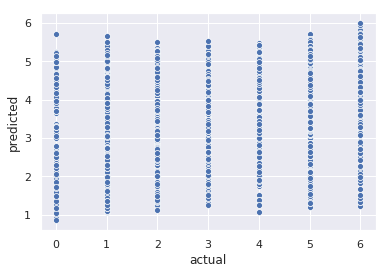

In [53]:
sns.scatterplot(data=lr_result_df, x='actual', y='predicted')

# Another attempt

In [54]:
sub_df.columns

Index(['JobSatisfaction', 'CareerSatisfaction', 'ConvertedSalary',
       'FormalEducation', 'YearsCoding', 'YearsCodingProf', 'NumberMonitors',
       'StackOverflowVisit', 'StackOverflowParticipate',
       'StackOverflowConsiderMember',
       ...
       'var_fwork_React', 'var_fwork_Spark', 'var_fwork_Spring',
       'var_fwork_TensorFlow', 'var_fwork_Torch/PyTorch', 'var_fwork_Xamarin',
       'CountLanguageWorkedWith', 'CountDBWorkedWith',
       'CountPlatformWorkedWith', 'CountFrameworkWorkedWith'],
      dtype='object', length=137)

In [55]:
sub_df.columns[1:15]

Index(['CareerSatisfaction', 'ConvertedSalary', 'FormalEducation',
       'YearsCoding', 'YearsCodingProf', 'NumberMonitors',
       'StackOverflowVisit', 'StackOverflowParticipate',
       'StackOverflowConsiderMember', 'Age', 'var_devtype_Back-end developer',
       'var_devtype_C-suite executive (CEO, CTO, etc.)',
       'var_devtype_Data or business analyst',
       'var_devtype_Data scientist or machine learning specialist'],
      dtype='object')

### Different model... (X is Columns 1 through 14)

In [56]:
# Choosing factors by column index from our overall dataframe
names_of_x_columns_2 = sub_df.columns[1:15]

# The Xs to build the model with (as numpy array)
X2 = sub_df.iloc[:,1:15].values

# The output we'd like to model is 'JobSatisfaction'
Y2 = sub_df.iloc[:,0].values

# Print stuff:
print("size of input data:", X.shape)
print("size of output data:", Y.shape)

size of input data: (45181, 136)
size of output data: (45181,)


In [57]:
X2

array([[3.0000e+00, 7.0841e+04, 5.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.0000e+00, 2.1426e+04, 3.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [4.0000e+00, 4.1671e+04, 5.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [3.0000e+00, 8.5000e+04, 3.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 6.6840e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 7.7928e+04, 6.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [58]:
Y2

array([1, 4, 5, ..., 1, 4, 1], dtype=int8)

In [59]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = .2, random_state=25)

# If int, random_state is the seed used by the random number generator; 
# If RandomState instance, random_state is the random number generator; 
# If None, the random number generator is the RandomState instance used by np.random.

print("Size of training set:", X2_train.shape)
print("Size of test set:", X2_test.shape)

Size of training set: (36144, 14)
Size of test set: (9037, 14)


### Second Linear Regression Model

In [60]:
# Define Linear Regression object
regr_2 = LinearRegression(normalize=True)

# Train the model using your training data
regr_2.fit(X2_train, Y2_train)

Y2_pred = regr_2.predict(X2_test)

lr_result_df_2 = pd.concat([pd.Series(Y2_pred),pd.Series(Y2_test)], axis=1)
lr_result_df_2.columns = ['predicted','actual']

# The coefficients
print('Coefficients: \n', regr_2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y2_test, Y2_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y2_test, Y2_pred))

# Note: mainly the positive columns, with higher coefficient values
# Talk about the negative and positive impact to salary
# Take highest and lowest coefficient and look at the column it corresponds to.

Coefficients: 
 [ 6.27319412e-01 -8.69717843e-08  3.15392441e-03  5.20882631e-02
 -3.63001305e-02  3.89824876e-02  3.82658820e-03  1.49836960e-03
 -5.88186286e-03 -1.98393884e-02 -1.63209144e-02  3.19910330e-01
 -3.40351288e-02  8.33779799e-02]
Mean squared error: 1.99
Variance score: 0.33


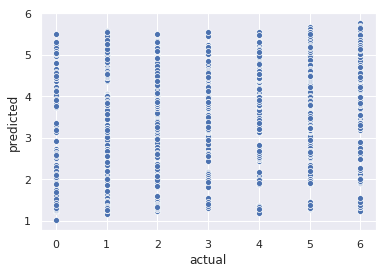

In [61]:
sns.scatterplot(data=lr_result_df_2, x='actual', y='predicted')

In [62]:
lr_2_coefficients = pd.concat([pd.DataFrame(sub_df.columns[1:],columns=['coef_name']),pd.DataFrame(regr_2.coef_,columns=['coef_value'])], axis = 1)
lr_2_coefficients.iloc[:, lambda df: [0, 1]]

,coef_name,coef_value
0,CareerSatisfaction,6.273194e-01
1,ConvertedSalary,-8.697178e-08
2,FormalEducation,3.153924e-03
3,YearsCoding,5.208826e-02
4,YearsCodingProf,-3.630013e-02
5,NumberMonitors,3.898249e-02
6,StackOverflowVisit,3.826588e-03
7,StackOverflowParticipate,1.498370e-03
8,StackOverflowConsiderMember,-5.881863e-03
9,Age,-1.983939e-02


In [63]:
lr_2_coefficients.sort_values(['coef_value'],ascending=False)

,coef_name,coef_value
0,CareerSatisfaction,6.273194e-01
11,"var_devtype_C-suite executive (CEO, CTO, etc.)",3.199103e-01
13,var_devtype_Data scientist or machine learning...,8.337798e-02
3,YearsCoding,5.208826e-02
5,NumberMonitors,3.898249e-02
6,StackOverflowVisit,3.826588e-03
2,FormalEducation,3.153924e-03
7,StackOverflowParticipate,1.498370e-03
1,ConvertedSalary,-8.697178e-08
8,StackOverflowConsiderMember,-5.881863e-03


### In a smaller subset of data, the linear regression produced similar results but there was also an observed correlation between knowledge of machine learning and Job Satisfaction.

### Ridge Regression Model

In [64]:
# Define Ridge Regression object
rr_regr = Ridge(alpha=.5, normalize=True)
# test with higher or lower alpha (0.2 and 0.7 or 0.75)
# try with different alpha values
# redo with different alpha

# OTHER PARAMETERS THAT CAN BE TUNED? Check on tolerance, precision, number of iterations.

# Train the model using your training data
rr_regr.fit(X_train, Y_train)

Y_pred = rr_regr.predict(X_test)

rr_result_df = pd.concat([pd.Series(Y_pred),pd.Series(Y_test)], axis=1)
rr_result_df.columns = ['predicted','actual']

# The coefficients
print('Coefficients: \n', rr_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [ 4.14991779e-01 -2.67831860e-08  5.17703507e-03  1.53381761e-02
 -5.11833409e-04  4.39485504e-02  4.87775859e-03  4.74186030e-03
  1.16687579e-02 -7.25069829e-03 -7.49227415e-03  2.42911426e-01
 -3.06760574e-02  7.05498129e-02  7.44169789e-04 -1.25081058e-02
 -1.40632075e-02 -5.88109128e-03  7.96110104e-02  3.76915779e-02
 -8.75966669e-03  1.32377218e-02 -3.77498527e-03  9.18597191e-03
  4.50985700e-03 -2.40793284e-02  1.03738544e-02  2.84074184e-02
  7.63770959e-03  6.51617192e-02 -8.91585716e-03  2.17931218e-02
  3.75564287e-02 -3.87968386e-03 -2.75159775e-03  1.32902710e-02
  1.34865925e-02 -3.89391277e-02 -1.32462655e-01  3.71721330e-03
  5.74801742e-03 -4.55734811e-02  2.12183540e-02  2.20039799e-03
  3.74845757e-02  1.75239297e-04  7.66125599e-04 -2.70985764e-02
 -2.09746157e-02  2.18836315e-02  2.36834551e-02  4.24670634e-02
 -7.20737442e-03  2.91979250e-02  7.56175987e-02 -5.09415240e-04
 -4.19331819e-02  9.63731953e-03  1.10552504e-02 -6.57013955e-03
 -5.99509

In [65]:
# combine data columns
rr_coefficients = pd.concat([pd.DataFrame(sub_df.columns[1:],columns=['coef_name']),pd.DataFrame(rr_regr.coef_,columns=['coef_value'])], axis = 1)
rr_coefficients.iloc[:, lambda df: [0, 1]]

,coef_name,coef_value
0,CareerSatisfaction,4.149918e-01
1,ConvertedSalary,-2.678319e-08
2,FormalEducation,5.177035e-03
3,YearsCoding,1.533818e-02
4,YearsCodingProf,-5.118334e-04
5,NumberMonitors,4.394855e-02
6,StackOverflowVisit,4.877759e-03
7,StackOverflowParticipate,4.741860e-03
8,StackOverflowConsiderMember,1.166876e-02
9,Age,-7.250698e-03


In [66]:
rr_coefficients.sort_values(['coef_value'],ascending=False)

,coef_name,coef_value
0,CareerSatisfaction,0.414992
11,"var_devtype_C-suite executive (CEO, CTO, etc.)",0.242911
77,var_db_Google BigQuery,0.090894
18,var_devtype_Educator or academic researcher,0.079611
54,var_langs_No Response,0.075618
13,var_devtype_Data scientist or machine learning...,0.070550
29,var_devtype_Student,0.065162
71,var_db_Amazon RDS/Aurora,0.060040
62,var_langs_Rust,0.058427
103,var_pform_Google Home,0.055946


# The normalized Ridge Regressions shows that Job Satisfaction was highly correlated with Career Satisfaction.  This was followed by Job Satisfaction being slightly correlated with being a C-Suite Execute (Developer Type), was dependent on the database learned--specifically a Google BigQuery database had the highest correlation with Job Satisfaction behind the other two variables.

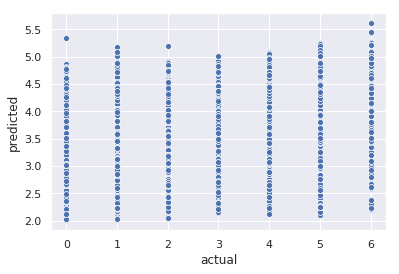

In [67]:
sns.scatterplot(data=rr_result_df, x='actual', y='predicted')

### Lasso Regression Model

In [68]:
# Define Lasso Regression object
lasso_regr = Lasso(alpha=0.01) # NORMALIZE screwed up the regression model here
# decreasing alpha increases the amount of coefficients that are non-zero

# Train the model using your training data
lasso_regr.fit(X_train, Y_train)

Y_pred = lasso_regr.predict(X_test)

lasso_result_df = pd.concat([pd.Series(Y_pred),pd.Series(Y_test)], axis=1)
lasso_result_df.columns = ['predicted','actual']

# The coefficients
print('Coefficients: \n', lasso_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [ 6.25461196e-01 -8.29593317e-08  0.00000000e+00  4.01122091e-02
 -2.38099507e-02  1.89712988e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -5.58652886e-03 -0.00000000e+00  1.96746997e-02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -8.87216375e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000

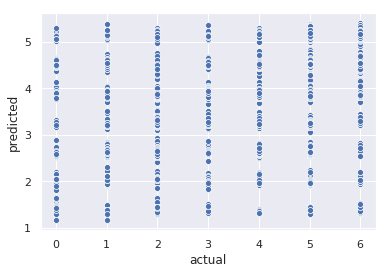

In [69]:
sns.scatterplot(data=lasso_result_df, x='actual', y='predicted')

In [70]:
# combine data columns
lasso_coefficients = pd.concat([pd.DataFrame(sub_df.columns[1:],columns=['coef_name']),pd.DataFrame(lasso_regr.coef_,columns=['coef_value'])], axis = 1)
lasso_coefficients.iloc[:, lambda df: [0, 1]]

,coef_name,coef_value
0,CareerSatisfaction,6.254612e-01
1,ConvertedSalary,-8.295933e-08
2,FormalEducation,0.000000e+00
3,YearsCoding,4.011221e-02
4,YearsCodingProf,-2.380995e-02
5,NumberMonitors,1.897130e-02
6,StackOverflowVisit,0.000000e+00
7,StackOverflowParticipate,0.000000e+00
8,StackOverflowConsiderMember,-0.000000e+00
9,Age,-5.586529e-03


In [71]:
lasso_coefficients.sort_values(['coef_value'],ascending=False)

,coef_name,coef_value
0,CareerSatisfaction,6.254612e-01
3,YearsCoding,4.011221e-02
11,"var_devtype_C-suite executive (CEO, CTO, etc.)",1.967470e-02
5,NumberMonitors,1.897130e-02
132,CountLanguageWorkedWith,5.824767e-03
93,var_pform_Amazon Echo,0.000000e+00
87,var_db_Oracle,-0.000000e+00
88,var_db_PostgreSQL,0.000000e+00
89,var_db_Redis,0.000000e+00
90,var_db_SQL Server,-0.000000e+00


# The Lasso Regression shows that CareerSatisfaction and Years Coding had the highest correlation with Job Satisfaction.  Again being a C-level developer type had a higher correlation with Job Satisfaction (behind these other variables).

In [72]:
# checking the data
X_train

array([[5.0000e+00, 9.8620e+04, 6.0000e+00, ..., 3.0000e+00, 6.0000e+00,
        2.0000e+00],
       [3.0000e+00, 4.0388e+04, 5.0000e+00, ..., 2.0000e+00, 3.0000e+00,
        0.0000e+00],
       [3.0000e+00, 3.7560e+03, 5.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        2.0000e+00],
       ...,
       [6.0000e+00, 3.8199e+04, 5.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [6.0000e+00, 6.5000e+04, 8.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        0.0000e+00],
       [6.0000e+00, 1.6680e+03, 4.0000e+00, ..., 3.0000e+00, 2.0000e+00,
        3.0000e+00]])

In [73]:
# checking the data
Y_train

array([5, 4, 2, ..., 5, 6, 1], dtype=int8)